<a href="https://colab.research.google.com/github/runjhunratawal/Machine-Learning-with-Python-Practice/blob/main/Supervised_ML_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Date - 01.03.2022

Time - 2.30pm IST

Topic - Supervised Machine Learning Algorithms

# K-Nearest Neighbours



In [4]:
!pip install mglearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 5.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=fc907550e39929f2b87aab33df53b18e1afeab9895b20cca491ddfb10a6a46ed
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [5]:
import mglearn
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

X.shape: (26, 2)


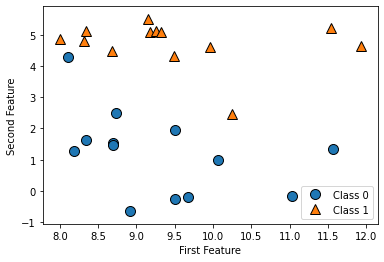

In [ ]:
x,y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(x[:,0],x[:,1],y)

plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")

print("X.shape: {}".format(x.shape))

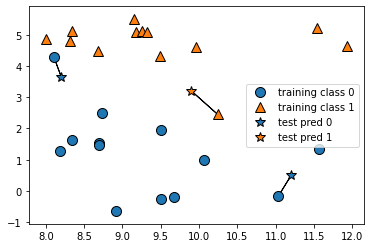

In [ ]:
''' 
    In this simple version of KNN Algorithm, we only consider "one nearest neighbour"  which is the closest training data point to the point we want to make a prediction for.
'''

mglearn.plots.plot_knn_classification(n_neighbors=1)  

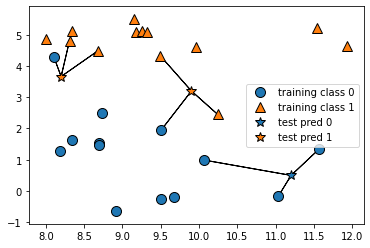

In [ ]:
''' 
  Now we will consider "4 nearest neighbours".
'''

mglearn.plots.plot_knn_classification(n_neighbors=3)
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Test set predictions: {}".format(clf.predict(x_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [ ]:
print("Test set accuracy: {:.2f}".format(clf.score(x_test,y_test)))

Test set accuracy: 0.86


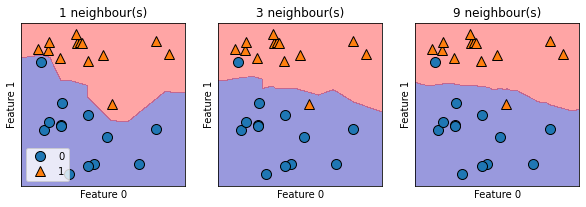

In [ ]:
from IPython.core.pylabtools import figsize
# Decision Boundary visualization

fig,axes = plt.subplots(1,3,figsize=(10,3))

for n_neighbors,ax in zip([1,3,9],axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(x,y)
  mglearn.plots.plot_2d_separator(clf,x,fill=True,eps=0.5,ax=ax,alpha=.4)
  mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
  ax.set_title("{} neighbour(s)".format(n_neighbors))
  ax.set_xlabel("Feature 0")
  ax.set_ylabel("Feature 1")

axes[0].legend(loc=3)

Date - 05.03.2022

Time - 3.00pm IST

Topic - Supervised Machine Learning Algorithms

# Linear Regression



In [6]:
import mglearn
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split


warnings.filterwarnings('ignore')

w[0]: 0.393906  b: -0.031804


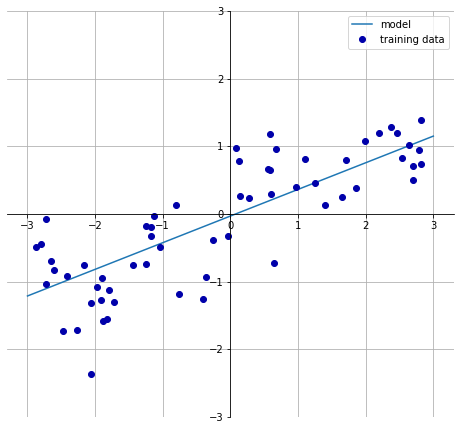

In [ ]:
mglearn.plots.plot_linear_regression_wave()

Date - 30.05.2022

Time - 7.00pm IST

Topic - Supervised Machine Learning Algorithms

# Decision Trees

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

Feature importances: [0. 1.]


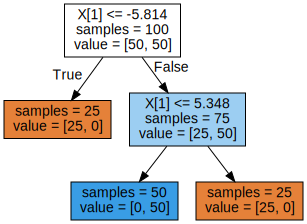

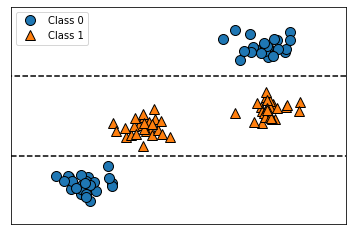

In [8]:
mglearn.plots.plot_tree_not_monotone()

In [12]:
cancer = load_breast_cancer()  #Creating Decision Tree on Breast Cancer dataset

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state = 42)

tree = DecisionTreeClassifier(random_state= 0)
tree.fit(X_train,Y_train)


DecisionTreeClassifier(random_state=0)

In [14]:
print(tree.score(X_train,Y_train))  #Accuracy on train set

1.0


In [15]:
print(tree.score(X_test,Y_test))  #Accuracy on test set

0.9370629370629371


In [18]:
import graphviz
from sklearn.tree import export_graphviz

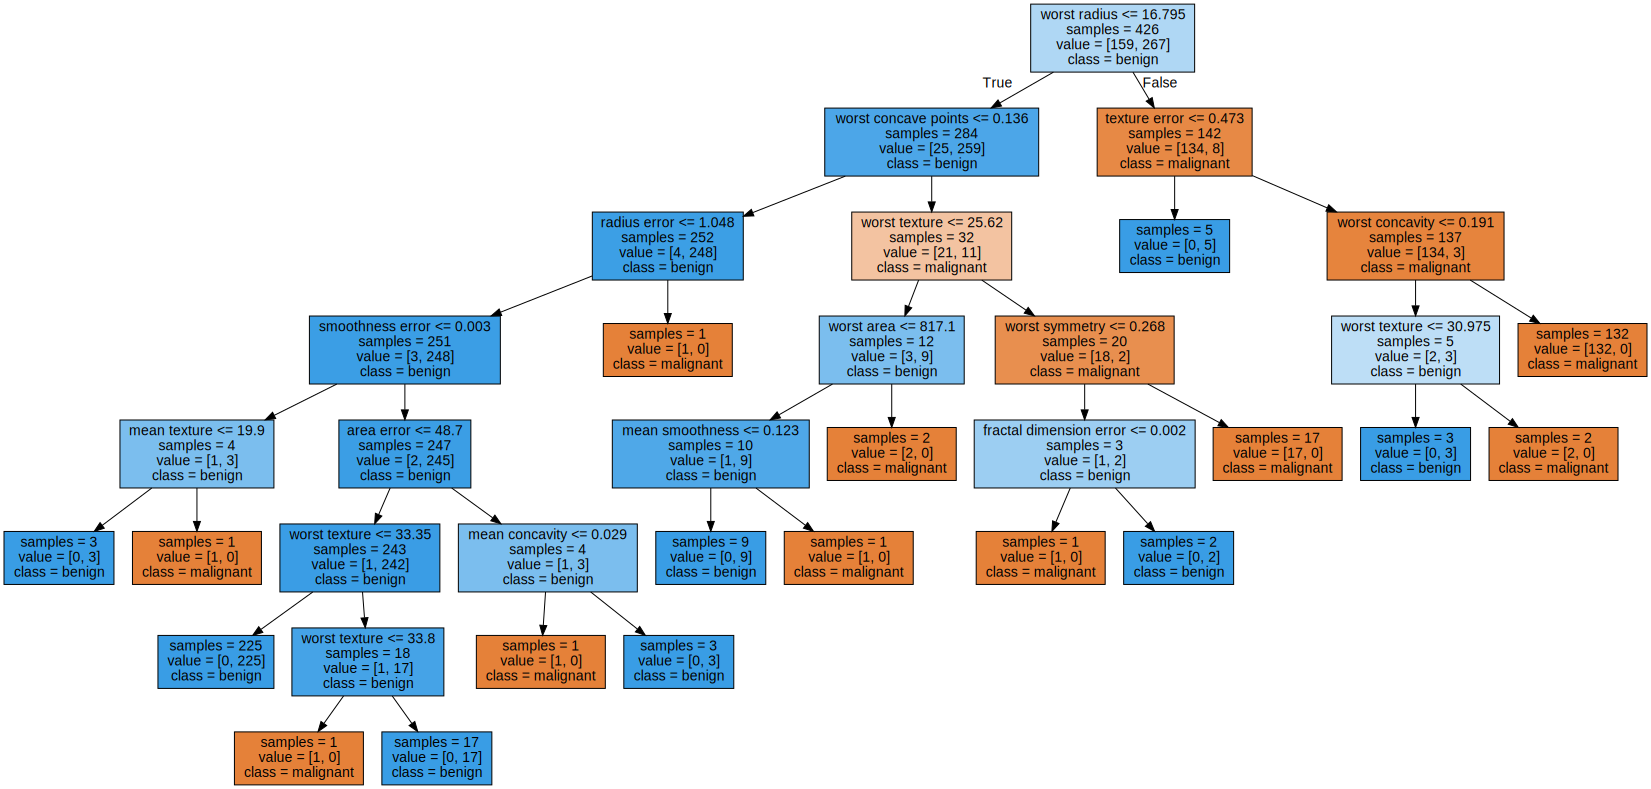

In [19]:
export_graphviz(tree,out_file="tree.dot", class_names=["malignant","benign"], feature_names=cancer.feature_names,impurity=False,filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))